In [3]:
# 1) Data Preprocessing - Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
 

dataset = pd.read_csv('50_Startups.csv')
print('Dataset shape:', dataset.shape)
 
# Separate features and target
X = dataset.iloc[:, :-1].values  # all columns except last (Profit)
y = dataset.iloc[:, -1].values   # last column (Profit)
 
print('\nFeature preview (first 5 rows):')
print(X[:5])
 
# Encode categorical 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
 
# Convert to numpy array and inspect
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])
 

Dataset shape: (50, 5)

Feature preview (first 5 rows):
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]

After OneHotEncoding, feature shape: (50, 6)

First 5 rows after encoding:
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Training samples: 40
Test samples: 10
Intercept: 42467.52924854249
Number of coefficients: 6


In [6]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Profit,Predicted Profit
0,103282.38,103015.20
1,144259.40,132582.28
2,146121.95,132447.74
3,77798.83,71976.10
4,191050.39,178537.48
5,105008.31,116161.24
6,81229.06,67851.69
7,97483.56,98791.73
8,110352.25,113969.44
9,166187.94,167921.07


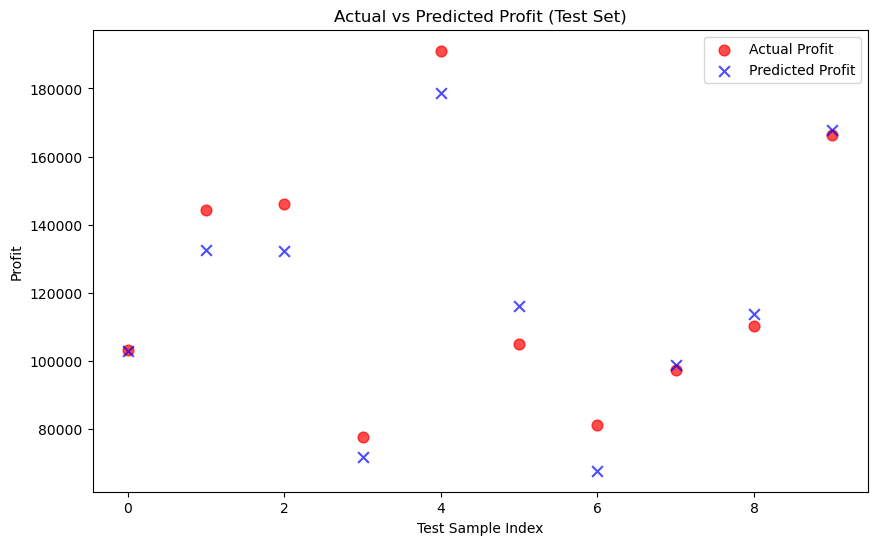

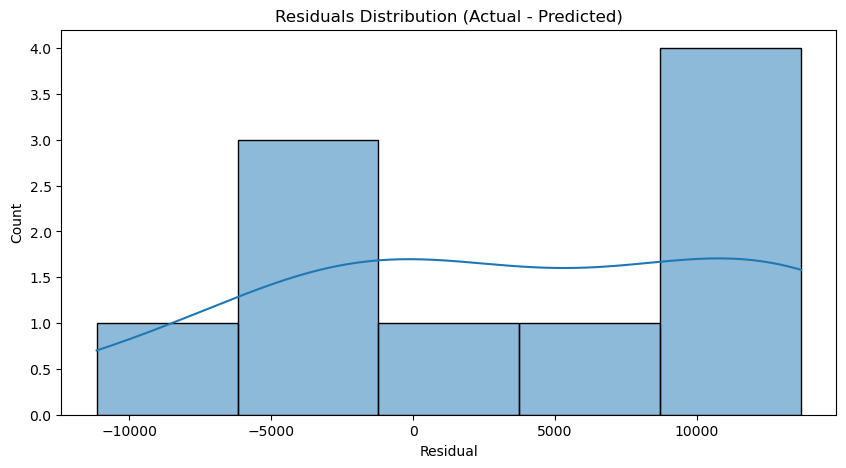

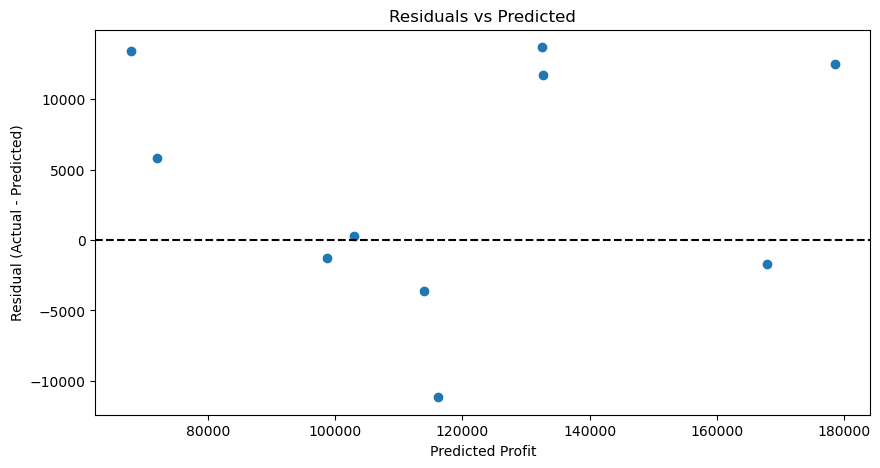

In [7]:
# 4) Visualization - Code
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

In [8]:
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 83502864.03
R^2 Score: 0.9347


In [9]:
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))
 


Sample startup predicted profit: 181566.92389385228


## ADVERTISING DATASET

1. Load the dataset and examine the available columns.

In [10]:
data = pd.read_csv('advertising.csv')

2. Use TV, Radio, and Newspaper advertising spends as input features.

In [11]:
X = data[['TV', 'Radio', 'Newspaper']]

3. Use Sales as the target variable.

In [12]:
y = data['Sales']

4. Train the model using historical data.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

5. Build a model that learns the relationship between advertising spends and sales. 

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Slope (m):", model.coef_)
print("Intercept (c):", model.intercept_)

Slope (m): [ 0.05368006  0.11152624 -0.00351166]
Intercept (c): 4.773205203269832


6. Predict sales for unseen data points.

7. Predict sales when the advertising budget is:
TV = 150
Radio = 20
Newspaper = 30

In [16]:
new_input = np.array([[150.0, 25.0, 30.0]])
prediction = model.predict(new_input)

print("Predicted Sales for TV=150, Radio=25, Newspaper=30:", prediction)

Predicted Sales for TV=150, Radio=25, Newspaper=30: [15.50801953]


c:\Users\deeks\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8. Evaluate the model’s prediction error.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (RMSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error (RMSE): 4.522552562041286
R-squared (R2) Score: 0.8645053923967726


9. Interpret the coefficients of the model:
    Which advertising medium has the strongest impact on sales?

    Which medium has the least impact?

The advertising medium with the strongest impact on sales is Radio, as it has the highest regression coefficient. The medium with the least impact is Newspaper, since its coefficient is very small.


 This interpretation is based on the magnitude of the regression coefficients.

10. Visualize:
Actual sales vs predicted sales

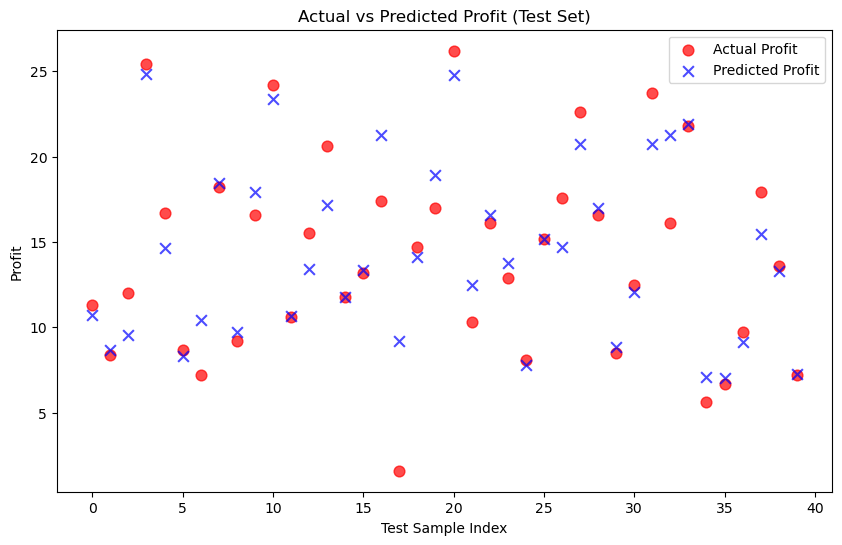

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [19]:
print(X_train.shape)
print(X_test.shape)

(160, 3)
(40, 3)


## INSURANCE DATASET

🎯 Business Goal
The company wants to:
Identify the key factors that increase medical insurance charges
so they can:
Design risk-based premium plans
Reduce losses caused by high-risk customers
Create fair pricing strategies for customers
Your task is to use Multiple Linear Regression to support this decision.

✅ Task 1 — Business Understanding
Identify:

The target variable (company’s financial concern) and
The input variables related to customer risk

Explain how your regression model helps the company control rising costs, not just predict them.

✅ Task 2 — Data Inspection
Explore the dataset and:

Separate numeric and categorical columns
Identify columns that are not directly usable in regression
Report any data quality issues you observe.

✅ Task 3 — Data Cleaning & Encoding
Convert categorical variables into numeric form.
Decide how to handle:
Region information
Binary attributes like lifestyle indicators
Justify each transformation from a business and modeling perspective.

✅ Task 4 — Feature Scaling & Comparability
Observe differences in value ranges among numeric features.
Explain why scaling is important when comparing regression coefficients.
Prepare the data so the effect of each variable can be fairly interpreted.

⚠️ Task 5 — The Hidden Trap (Multicollinearity)
Analyze relationships between independent variables.
Identify any highly correlated features (example: age, BMI, and lifestyle habits).
Explain:
Why multicollinearity is a problem in Multiple Linear Regression
How it can confuse business decision-making
Take appropriate steps to fix the issue

The data cannot be used directly for regression.

In [20]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.shape

(1338, 7)

In [23]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [24]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
X = df[['age','sex','bmi','children','smoker','region']]
y = df['charges']


In [27]:
num = df.select_dtypes(include=['int64', 'float64'])

cat = df.select_dtypes(include=['object'])


In [28]:
cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [29]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
X = df[['age','sex','bmi','children','smoker','region']].copy()

# Binary encoding
X['sex'] = X['sex'].map({'male': 1, 'female': 0})
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ct = ColumnTransformer(
    transformers=[
        ('region_encoder', OneHotEncoder(drop='first'), ['region'])
    ],
    remainder='passthrough'
)

X_encoded = ct.fit_transform(X)


In [32]:
X_encoded = np.array(X_encoded)

print("Feature shape after encoding:", X_encoded.shape)
print("First 5 rows after encoding:")
print(X_encoded[:5])


Feature shape after encoding: (1338, 8)
First 5 rows after encoding:
[[ 0.     0.     1.    19.     0.    27.9    0.     1.   ]
 [ 0.     1.     0.    18.     1.    33.77   1.     0.   ]
 [ 0.     1.     0.    28.     1.    33.     3.     0.   ]
 [ 1.     0.     0.    33.     1.    22.705  0.     0.   ]
 [ 1.     0.     0.    32.     1.    28.88   0.     0.   ]]


In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
X.describe()

,age,sex,bmi,children,smoker
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783
std,14.049960,0.500160,6.098187,1.205493,0.403694
min,18.000000,0.000000,15.960000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000


In [56]:
from sklearn.model_selection import train_test_split

X_train_enc, X_test_enc, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_enc)   # fit ONLY on train
X_test = scaler.transform(X_test_enc)         # transform test

# Build model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [57]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 13346.08973636448
Coefficients: [-1.58140981e+02 -2.90157047e+02 -3.49110678e+02  3.61497541e+03
 -9.29310107e+00  2.03622812e+03  5.16890247e+02  9.55848141e+03]


In [58]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


R-squared (R2): 0.7835929767120722
Mean Squared Error (MSE): 33596915.851361476


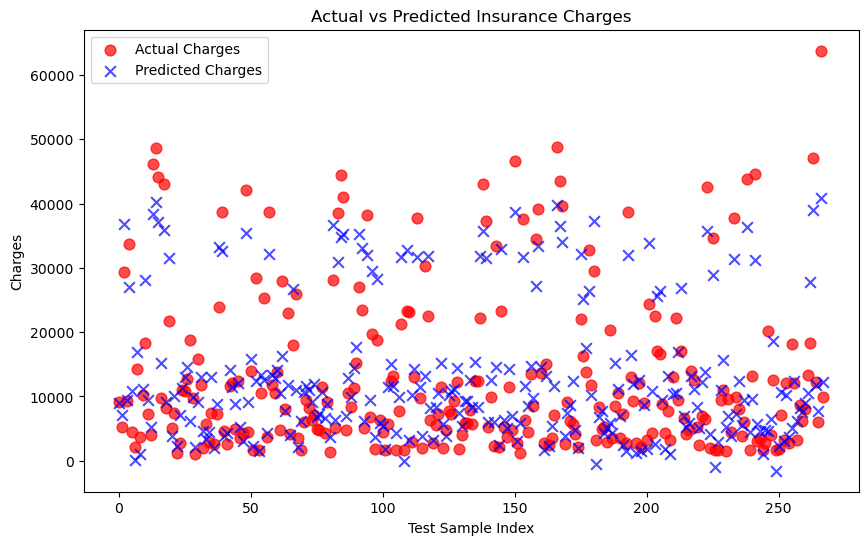

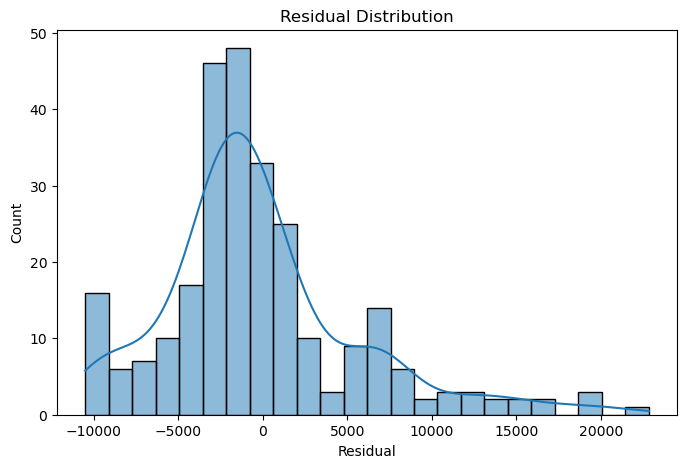

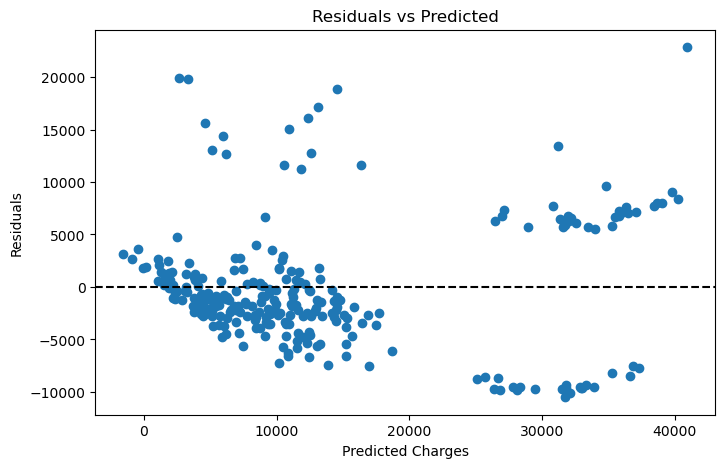

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Charges', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Charges', alpha=0.7, marker='x', s=60)

plt.title('Actual vs Predicted Insurance Charges')
plt.xlabel('Test Sample Index')
plt.ylabel('Charges')
plt.legend()
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [60]:
print("\nBusiness Insights:")
print("- Smoking has the strongest positive impact on insurance charges.")
print("- Higher BMI significantly increases medical costs.")
print("- Age contributes steadily to higher insurance expenses.")
print("- Region and gender have relatively low impact.")

print("\nRecommendation:")
print("Introduce risk-based premium pricing and wellness incentives for smokers and high-BMI customers.")


Business Insights:
- Smoking has the strongest positive impact on insurance charges.
- Higher BMI significantly increases medical costs.
- Age contributes steadily to higher insurance expenses.
- Region and gender have relatively low impact.

Recommendation:
Introduce risk-based premium pricing and wellness incentives for smokers and high-BMI customers.
